Your Name<br>
Ege University - IEEE Student<br>
Mastering Applied Data Science with Deep Learning, January 2021 cohort<br>

<h1 align="center">NLP Project Final Project</h1>

# Introduction #
**Problem Statement**: Classifying Amazon reviews based on customer ratings using NLP

<h4 align="center">Impact</h4>

Reviews provide objective feedback to a product and are therefore inherently useful for consumers. These ratings are often summarized by a numerical rating, or the number of stars. Of course there is more value in the actual text itself than the quantified stars. And at times, the given rating does not truly convey the experience of the product – the heart of the feedback is actually in the text itself. The goal therefore is to build a classifier that would understand the essence of a piece of review and assign it the most appropriate rating based on the meaning of the text.

<h4 align="center">Background</h4>

Though product ratings on Amazon are aggregated from all the reviews by every customer, each individual rating is actually only an integer that ranges from one star to five stars. This reduces our predictions to discrete classes totaling five possibilities. Therefore what we'll have is a supervised, multi-class classifier with the actual review text as the core predictor.

This study is an exploration of Natural Language Processing (NLP). The goal of predicting the star rating given a piece of text will take on different NLP topics including word embedding, topic modeling, and dimension reduction. From there, we'll arrive at a final dataframe and we'll be employing different machine learning techniques in order to come up with the best approach (i.e. most accurate estimator) for our classifier.

<h4 align="center" id="Datasets">Datasets</h4>

The [Amazon dataset](http://jmcauley.ucsd.edu/data/amazon/index.html) contains the customer reviews for all listed *Electronics* products spanning from May 1996 up to July 2014. There are a total of 1,689,188 reviews by a total of 192,403 customers on 63,001 unique products. The data dictionary is as follows:

*  **asin** - Unique ID of the product being reviewed, *string*
*  **helpful** - A list with two elements: the number of users that voted *helpful*, and the total number of users that voted on the review (including the *not helpful* votes), *list*
*  **overall** - The reviewer's rating of the product, *int64*
*  **reviewText** - The review text itself, *string*
*  **reviewerID** - Unique ID of the reviewer, *string*
*  **reviewerName** - Specified name of the reviewer, *string*
*  **summary** - Headline summary of the review, *string*
*  **unixReviewTime** - Unix Time of when the review was posted, *string*

# Data Wrangling #

In [9]:
import warnings

warnings.filterwarnings("ignore") # Uyrıları kaldırma

The `df` is created from the Amazon dataset. If the file has been downloaded then the dataset is loaded from the local file. Otherwise the file is accessed and extracted directly from the repository.

In [2]:
import os
import pandas as pd

dataset = "Electronics_5.json"

if os.path.isfile(dataset):
    df = pd.read_json("Electronics_5.json", lines=True)
else:
    url = r"http://snap.stanford.edu/data/amazon/productGraph/categoryFiles/reviews_Electronics_5.json.gz"
    df = pd.read_json(url, compression='gzip', lines=True)

df.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"
3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",1290556800,"11 24, 2010"
4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",1317254400,"09 29, 2011"


In [3]:
df.to_csv("amazon.csv")

In [4]:
df=pd.read_csv("amazon.csv")

Only the `overall` and the `unixReviewTime` series are stored as integers. The rest are interpreted as strings (objects).

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1689188 entries, 0 to 1689187
Data columns (total 10 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   Unnamed: 0      1689188 non-null  int64 
 1   reviewerID      1689188 non-null  object
 2   asin            1689188 non-null  object
 3   reviewerName    1664279 non-null  object
 4   helpful         1689188 non-null  object
 5   reviewText      1688117 non-null  object
 6   overall         1689188 non-null  int64 
 7   summary         1689172 non-null  object
 8   unixReviewTime  1689188 non-null  int64 
 9   reviewTime      1689188 non-null  object
dtypes: int64(3), object(7)
memory usage: 128.9+ MB


The `unixReviewTime` is converted from Unix time to the more intuitive `datetime` datatype.

In [6]:
df.head(3)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,1370131200,"06 2, 2013"
1,1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,1290643200,"11 25, 2010"
2,2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,1283990400,"09 9, 2010"


In [7]:
from datetime import datetime

df["unixReviewTime"]=pd.to_datetime(df["unixReviewTime"],unit="s")
df["unixReviewTime"]=df["unixReviewTime"].dt.strftime("%m-%d-%Y")
# ay gün yıl şeklinde zaman formatına cevirdik

In [8]:
df.sample(3)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
202149,202149,A3D06W341DO1XE,B000EXR0SI,Jake The Snake!!,"[3, 3]",I've been using this lens for almost 3 years n...,4,Not the best but worth the money!,04-11-2013,"04 11, 2013"
1000966,1000966,A03689333FEZ6C8ZU6OCF,B004PRUTLY,Brian Young,"[3, 3]",Used these to replace the front OE speakers in...,5,Work Great,11-22-2012,"11 22, 2012"
326019,326019,A219CBDNLGGH88,B000V5P90K,"R. Berryman ""RMB""","[3, 4]",It's hard to write a meaningful review when I'...,5,An EXCELLENT camera,10-22-2007,"10 22, 2007"


The `reviewTime` is dropped since the `unixReviewTime` series more accurately describes the time when each review was posted.

In [9]:
df.drop("reviewTime",axis=1)

,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime
0,0,AO94DHGC771SJ,0528881469,amazdnu,"[0, 0]",We got this GPS for my husband who is an (OTR)...,5,Gotta have GPS!,06-02-2013
1,1,AMO214LNFCEI4,0528881469,Amazon Customer,"[12, 15]","I'm a professional OTR truck driver, and I bou...",1,Very Disappointed,11-25-2010
2,2,A3N7T0DY83Y4IG,0528881469,C. A. Freeman,"[43, 45]","Well, what can I say. I've had this unit in m...",3,1st impression,09-09-2010
3,3,A1H8PY3QHMQQA0,0528881469,"Dave M. Shaw ""mack dave""","[9, 10]","Not going to write a long review, even thought...",2,"Great grafics, POOR GPS",11-24-2010
4,4,A24EV6RXELQZ63,0528881469,Wayne Smith,"[0, 0]",I've had mine for a year and here's what we go...,1,"Major issues, only excuses for support",09-29-2011
...,...,...,...,...,...,...,...,...,...
1689183,1689183,A34BZM6S9L7QI4,B00LGQ6HL8,"Candy Cane ""Is it just me?""","[1, 1]",Burned these in before listening to them for a...,5,Boom -- Pop -- Pow. These deliver.,07-17-2014
1689184,1689184,A1G650TTTHEAL5,B00LGQ6HL8,"Charles Spanky ""Zumina Reviews""","[0, 0]",Some people like DJ style headphones or earbud...,5,"Thin and light, without compromising on sound ...",07-15-2014
1689185,1689185,A25C2M3QF9G7OQ,B00LGQ6HL8,Comdet,"[0, 0]",I&#8217;m a big fan of the Brainwavz S1 (actua...,5,Same form factor and durability as the S1 with...,07-17-2014
1689186,1689186,A1E1LEVQ9VQNK,B00LGQ6HL8,J. Chambers,"[0, 0]","I've used theBrainwavz S1 In Ear Headphones, a...",5,Superb audio quality in a very comfortable set...,07-18-2014


Each review is stored as string in the `reviewText` series. A sample product review is below:

In [10]:
df["reviewText"].iloc[0]

'We got this GPS for my husband who is an (OTR) over the road trucker.  Very Impressed with the shipping time, it arrived a few days earlier than expected...  within a week of use however it started freezing up... could of just been a glitch in that unit.  Worked great when it worked!  Will work great for the normal person as well but does have the "trucker" option. (the big truck routes - tells you when a scale is coming up ect...)  Love the bigger screen, the ease of use, the ease of putting addresses into memory.  Nothing really bad to say about the unit with the exception of it freezing which is probably one in a million and that\'s just my luck.  I contacted the seller and within minutes of my email I received a email back with instructions for an exchange! VERY impressed all the way around!'

Each review is associated with a rating stored under the `overall` field. This serves as the quantified summary of a given review and will thus be used as the ground truth labels for the model.

In [11]:
df["overall"].unique()

array([5, 1, 3, 2, 4])

Verimiz çok büyük oldugu için içinden rastgele 400000 tanesini secererk veriyi küçültüyoruz

In [12]:
df=df.sample(400000)

In [13]:
df.shape

(400000, 10)

In [14]:
df.to_csv("kucuk_amazon.csv") # küçülttüğümüz veriyi kaydettik

In [10]:
import pandas as pd

In [11]:
df=pd.read_csv("kucuk_amazon.csv")

In [12]:
df.head()

,Unnamed: 0.1,Unnamed: 0,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,11493,11493,A231WM2Z2JL0U3,B00004WHF1,Rheumor,"[4, 5]","The fit is fine and the finish is excellent, w...",5,Fits like a glove.,06-14-2002,"06 14, 2002"
1,275637,275637,A3APC1Y2JQ7MZA,B000NOMODE,"Ryan H. Martin ""Photography and Technical Guy""","[0, 1]",PROS:- On-screen iPod menu controls (DLO propr...,3,"Sluggish, but enjoyable",08-26-2008,"08 26, 2008"
2,1632512,1632512,A1IL1AZ6B56U26,B00E1UVXHO,yanjumoye,"[1, 1]",Amazing headphones. ..hear instruments through...,5,wonderful headset,12-12-2013,"12 12, 2013"
3,816195,816195,A257L3Z155DIKA,B003SG5A2Q,theward1,"[1, 1]",these area great cables!! they arnt very flex...,5,Great AUX cables!,06-21-2011,"06 21, 2011"
4,83405,83405,A1P1O16N3ROSUY,B0000XMUWS,Live_Aloha,"[0, 0]",This is an AMAZING filter! I bought it with my...,5,Best accessory to my Moon viewing,09-25-2013,"09 25, 2013"


## NLP Pre-Processing ##
We'll work with `reviewText` to prepare our model's final dataframe. The goal is to produce tokens for every document (i.e. every review). These documents will make up our corpora where we'll draw our vocabulary from.

The following is a sample text in its original form.

In [13]:
rastgele=df["reviewText"].iloc[25648]
rastgele

'I am very pleased with the speed of this modem compared to the one I was renting from Charter for $7.00/mo. The moment I installed Charter reconized and automatically picked up the address. So easy. I would recommend to a friend.'

### HTML Entities ###
Some special characters like the apostrophe (’) and the en dash (–) are expressed as a set of numbers prefixed by `&#` and suffixed by `;`. This is because the dataset was scraped from an HTML parser, and the dataset itself includes data that predated the universal UTF-8 standard.

These *HTML Entities* can be decoded by importing the `html` library.

In [14]:
import html

decoded_review = html.unescape(rastgele)
decoded_review

'I am very pleased with the speed of this modem compared to the one I was renting from Charter for $7.00/mo. The moment I installed Charter reconized and automatically picked up the address. So easy. I would recommend to a friend.'

reviewText sütununnu küçük harfe çevirip, noktalama işareti,satır başı gibi şeyleri kaldırdık

In [15]:
# Her şeyi kucuk harfe çevir
df["reviewText"]=df["reviewText"].str.lower()

# Noktalama işaretlerini kaldır
df["reviewText"]=df["reviewText"].str.replace('[^\w\s]','' , regex=True)

# Rakamlari kaldır
df["reviewText"]=df["reviewText"].str.replace('\d+','' , regex=True)

# Satir sonlarini kaldir \n
df["reviewText"]=df["reviewText"].str.replace('\n','' , regex=True )
df["reviewText"]=df["reviewText"].str.replace('\r','' , regex=True)

In [16]:
df["reviewText"][5]

'these are the best noise canceling headphones for the price if you buy them used here on amazon  for less than  you cannot do better  they are well made  fit great  and provide adequate noise canceling  not as good as bose but at  the cost'

## Principal Component Analysis ##
Principal Component Analysis (*PCA*) is a dimensionality reduction technique that we can use on our `model_df` to reduce its 100 dimensions to just two dimensions. This will help visualize if there is a clear decision boundary along the five `overall` rating classifications. The more datapoints belonging to the same class are clustered together, the higher the likelihood that our machine learning model is simpler and more effective.

<Axes: xlabel='overall', ylabel='count'>

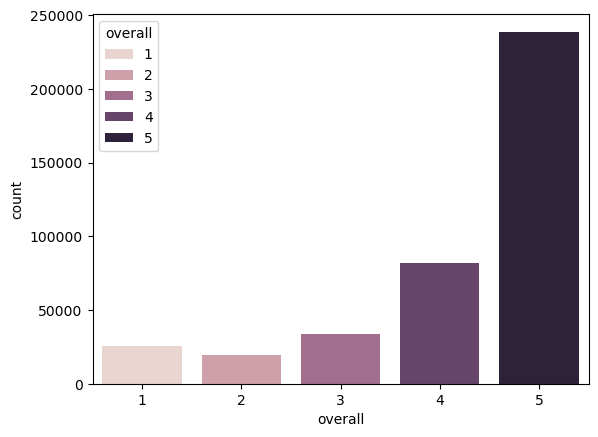

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x=df["overall"],hue=df["overall"]) # Yıldızlardan kaçar tane olduguna baktık

## NER ##
The capability of *spaCy'*s NER is based on deciphering the structure of the sentence by breaking down how tokens interact with and influence each other. Below is the dependency trees of the first three sentences of the `most_helpful_text`.

NER Bir yazının içerisinde egçen yer, kişi ve oraganizasyon isimleri tespit

In [18]:
import spacy
from spacy import displacy
NER=spacy.load("en_core_web_sm")

In [19]:
text=df["reviewText"][129]
text

'just got it today from amazonset up on android phone and tablet was easy  wouldnt go on ipad   at least for us  did go on win laptopmajor disappointment was netflix  send instruction from phone to start playing bbc sherlock holmes from netflix  pic quality was barely sd  then replayed those first five minutes and rest of program on netflix from the built in netflix app on our panny plasma  hd quality  we also get hd like streaming from netflix from our sony bd players netflix app  since this is a work in progress  will just give it an average rating for now and come back in a month or two  this product could be a major life changeri am surprised that there is no amazon app since they were one of only two outlets bbuy being the other to carry the productam glad i got it'

In [20]:
text1=NER(text)

In [21]:
for word in text1.ents:
    print(word.text,word.label_)

today DATE
netflix GPE
bbc ORG
netflix GPE
first ORDINAL
five minutes TIME
netflix GPE
netflix GPE
netflix GPE
sony ORG
netflix GPE
month DATE
two CARDINAL
changeri NORP
one CARDINAL
only two CARDINAL


In [22]:
spacy.explain("PERSON")

'People, including fictional'

In [23]:
spacy.explain("GPE")

'Countries, cities, states'

In [24]:
displacy.render(text1)

In [25]:
displacy.render(text1, style="ent",jupyter=True)

## Topic Modeling ##


Topic Modeling (Konu Modellemesi), büyük metin koleksiyonlarındaki gizli yapıları ortaya çıkarmak için kullanılan bir doğal dil işleme (NLP) tekniğidir. Bu teknik, belgeleri belirli konulara ayırarak her belgenin hangi konularla ilişkili olduğunu anlamaya yardımcı olur. Topic modeling, metin verilerini analiz etme ve gruplama için yaygın olarak kullanılır.<br>
En popüler topic modeling yöntemlerinden biri LDA dır

In [26]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

documents=df["reviewText"]
# Boş değerleri kaldırma (hem None hem de np.nan için)
documents = [doc for doc in documents if pd.notna(doc)]
documents

['the fit is fine and the finish is excellent with high quality soft leather and a secure snap i like the  pockets which allow room to put a drivers license and a couple of credit cards i would have welcomed little pockets for multimedia cards or securedigitals and a beltloop but its still a good case and a good deal',
 'pros onscreen ipod menu controls dlo proprietary interface not a clone of whats on your ipod menus displays song and album art of whats playing though not fullscreen plays video and music through your home theater system continues to charge your ipod when dock is put on standby remote control also simple to find a replacement on dlos website if say someone dropped it onto a hardwood floor and broke itcons remote control range is somewhat limited the docks response time is slower than desired theres noticeable lag between the time you hit a button on the remote and the time its reflected on screenextra two centsim not sure why its so complicated to design a dock such as

In [27]:
# Kelime matrisini oluştur
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(documents)

# LDA modelini oluştur
lda = LatentDirichletAllocation(n_components=2, random_state=42)
lda.fit(X)

# Modelin öğrendiği konuları ve her konudaki en önemli kelimeleri yazdırın:
for idx, topic in enumerate(lda.components_):
    print(f"Topic {idx}:")
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-5:]])

Topic 0:
['good', 'great', 'just', 'use', 'sound']
Topic 1:
['like', 'great', 'use', 'case', 'camera']


The words that are the most characteristic of the topics are indeed thematic. And each word group do conjure a distinct topic.

# Machine Learning #
We'll further process our finalized dataframe in order to make it compatible and easy to pipe into our Machine Learning model.

In [28]:
df.isnull().sum(),

Unnamed: 0.1         0
Unnamed: 0           0
reviewerID           0
asin                 0
reviewerName      5979
helpful              0
reviewText         259
overall              0
summary              5
unixReviewTime       0
reviewTime           0
dtype: int64

In [29]:
df=df.drop("reviewerName",axis=1)

In [30]:
df.shape

(400000, 10)

In [31]:
df=df.dropna()

In [32]:
df.shape

(399736, 10)

In [33]:
x=df["reviewText"]
y=df["overall"]

In [34]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\erkan\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [35]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [36]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer

pr=PorterStemmer()

In [37]:
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]
# Ekleri kaldıreıp kökleri bulan ve tokenize eden fonksiyon

In [38]:
vect=CountVectorizer(stop_words="english",ngram_range=(1,3),analyzer=lemmafn) #Döndü Dönmedi (Önüne arkasına bak)
                                                                              # Stopwords kaldır

In [39]:
x=vect.fit_transform(x)

In [40]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2) # train ve test verilerini ayırdık

In [41]:
nb=MultinomialNB()

In [42]:
model =nb.fit(x_train,y_train) # Modeli eğittik

In [43]:
tahmin=model.predict(x_test) # Tahmin yaptık

In [44]:
accuracy_score(tahmin,y_test)

0.6273077500375244

<Axes: >

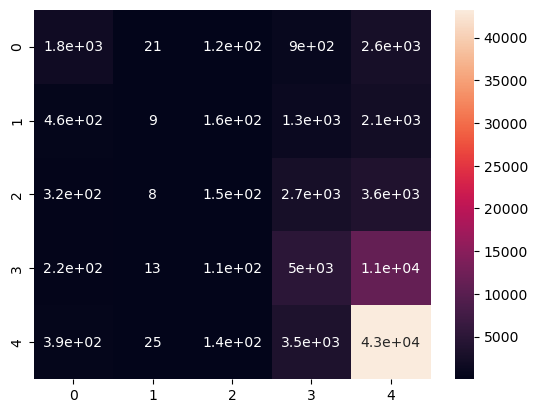

In [45]:
sns.heatmap(confusion_matrix(y_test,tahmin),annot=True)

In [46]:
print(classification_report(y_test,tahmin))

              precision    recall  f1-score   support

           1       0.56      0.33      0.42      5359
           2       0.12      0.00      0.00      3973
           3       0.22      0.02      0.04      6750
           4       0.37      0.30      0.33     16508
           5       0.69      0.91      0.79     47358

    accuracy                           0.63     79948
   macro avg       0.39      0.31      0.32     79948
weighted avg       0.55      0.63      0.57     79948



## Wordcloud

In [47]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
from PIL import Image
import numpy as np

In [48]:
def wc(data,bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("comment.png"))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask)
    wc.generate(" ".join(data))  # join Metindeki satırları birleştiri - generate En çok tekrar edenleri saydı
    plt.imshow(wc)
    plt.axis("off")

In [49]:
iyi=df[df["overall"]>4]["reviewText"] # 5 yıldızlı yorumlar

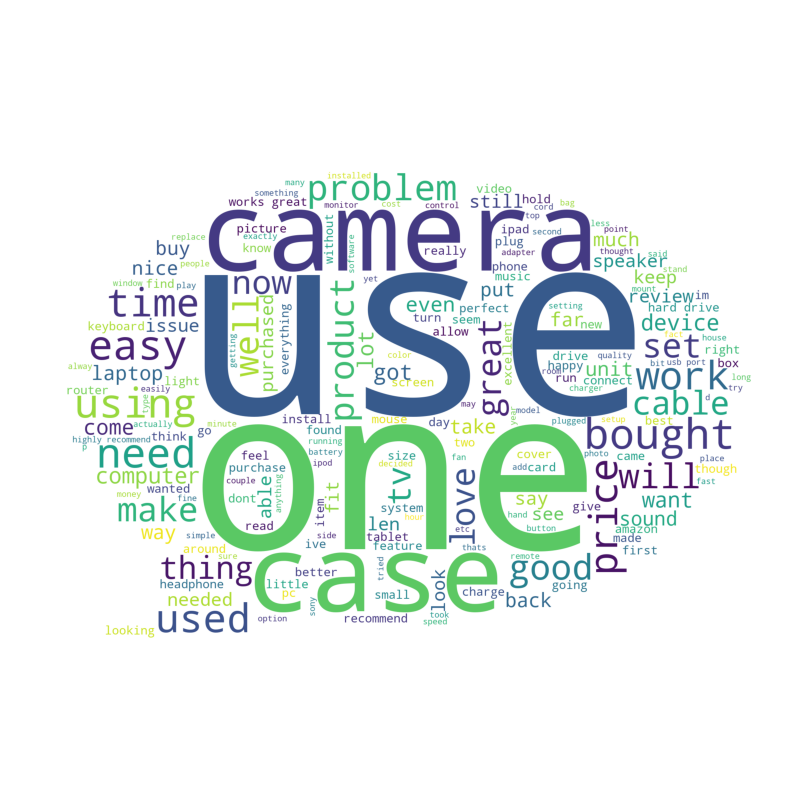

In [50]:
wc(iyi,"white")

In [51]:
kotu=df[df["overall"]<2]["reviewText"] # 1 yıldızlı yorumlar

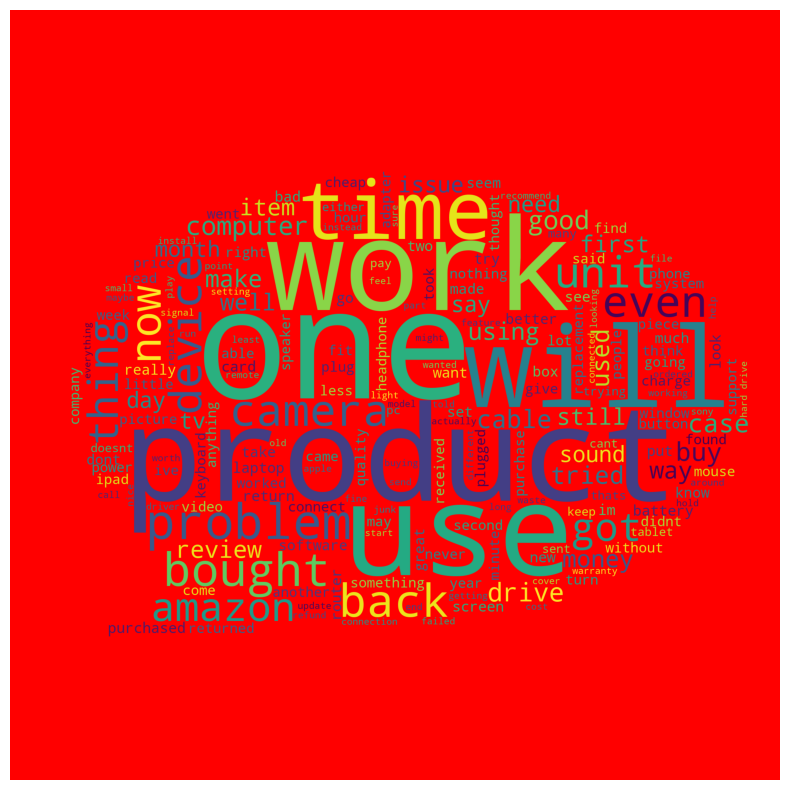

In [52]:
wc(kotu,"red")

### Sentiment Analiz

In [53]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [54]:
iyi['textblob_sentiment'] = iyi.apply(lambda x: TextBlob(x).sentiment.polarity)

In [55]:
iyi['textblob_sentiment']

0         0.409907
2         0.309375
3         0.420635
4         0.211661
7         0.497222
            ...   
399993    0.135000
399994   -0.328125
399995    0.600000
399998    0.348684
399999    0.361458
Name: reviewText, Length: 238652, dtype: float64

In [56]:
kotu['textblob_sentiment'] = kotu.apply(lambda x: TextBlob(x).sentiment.polarity)

In [57]:
kotu['textblob_sentiment']

20        3.343664e-01
30       -2.888889e-02
59        1.380952e-01
73        0.000000e+00
77       -3.125000e-01
              ...     
399957    4.610390e-02
399965   -2.166667e-01
399967   -1.387779e-17
399975    1.365728e-01
399977   -1.525000e-01
Name: reviewText, Length: 25825, dtype: float64

### Pipeline

Eğer modelimizi kaydedip başka yerlerde tekrar kullanmak istiyorsak pipeline kullanabiliriz.

In [64]:
from sklearn.pipeline import Pipeline

In [65]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier

In [66]:
x=df["reviewText"]
y=df["overall"]

In [67]:
clf=Pipeline([("tfidf",TfidfVectorizer()),("classifier",RandomForestClassifier())])

In [68]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=.2)

In [69]:
clf.fit(x_train,y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()),
                ('classifier', RandomForestClassifier())])

In [70]:
y_pred=clf.predict(x_test)

In [71]:
accuracy_score(y_test,y_pred)

0.595074298293891

In [72]:
confusion_matrix(y_test,y_pred)

array([[   85,     0,     0,    34,  5240],
       [   12,     4,     0,    45,  3912],
       [    2,     2,     8,    78,  6660],
       [    1,     1,     1,   182, 16323],
       [    1,     0,     2,    59, 47296]], dtype=int64)